<a href="https://colab.research.google.com/github/SainRigo/fast_rcnn/blob/main/Copy_of_Fast_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Detectron2 Dependencies

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.12.0 torchvision==0.12.0-f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 3.7 MB/s eta 0:00:00
  ERROR: Cannot unpack file /tmp/pip-unpack-qccg55eu/torch_stable.html (downloaded from /tmp/pip-req-build-yvxd65dy, content-type: text/html); cannot detect archive format
ERROR: Cannot determine archive format of /tmp/pip-req-build-yvxd65dy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-ddcht9ml
  Running command git clone

In [ ]:
# install detectron2:
!pip install git+https://github.com/facebookresearch/detectron2

  Cloning https://github.com/facebookresearch/detectron2 to /tmp/pip-req-build-kjlvh5v3
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2 /tmp/pip-req-build-kjlvh5v3
  Resolved https://github.com/facebookresearch/detectron2 to commit 1a4df4d954089534daebbd7a0a45f08ece87056e
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310

In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

# Import and Register Custom Detectron2 Data

In [ ]:
#
!curl -L "{YOUR LINK HERE}" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
!curl -L "https://app.roboflow.com/ds/6uJdlNAm9w?key=8zBJm9QjBc" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/E14_2_jpg.rf.96fdf60e9c6806e82095395088079412.jpg  
 extracting: train/E14_2_jpg.rf.e34c4df751231e4bf691e429f91e7f15.jpg  
 extracting: train/E14_3_jpg.rf.2d41a10b706d27d48c8d14058d1f7326.jpg  
 extracting: train/E14_3_jpg.rf.670fe9d5d63d31fcd8347a61b2e1b83f.jpg  
 extracting: train/E14_3_jpg.rf.aa6f7a59eaa77903ce19c86c4f158469.jpg  
 extracting: train/E14_5_jpg.rf.2a211a92ace1a7d781e7dbf1ab2c7e3e.jpg  
 extracting: train/E14_5_jpg.rf.881855f0472c7be9fe6edee993e68590.jpg  
 extracting: train/E14_5_jpg.rf.f324b63e3240a28de94c21b620810ac6.jpg  
 extracting: train/E15_1_jpg.rf.1844b23e34676ff9267c457a22c8bb38.jpg  
 extracting: train/E15_1_jpg.rf.36eff21ac35421275241b4bca290dc2b.jpg  
 extracting: train/E15_1_jpg.rf.575d1a7f91f9fc8e5bbf6411cec1c652.jpg  
 extracting: train/E15_2_jpg.rf.304489a816c612dc47c99601ef459561.jpg  
 extracting: train/E15_2_jpg.rf.3b2ba9680cca725006502e4acffd8085.jpg  
 extracting: train/E15_2_j

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_dataset_val", {}, "/content/valid/_annotations.coco.json", "/content/valid")
register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")


WARNING [10/03 10:28:34 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/03 10:28:34 d2.data.datasets.coco]: Loaded 6714 images in COCO format from /content/train/_annotations.coco.json


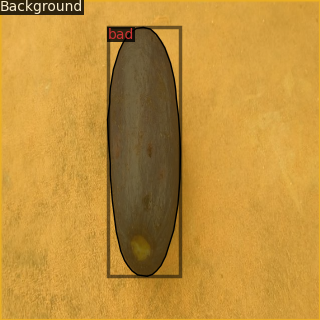

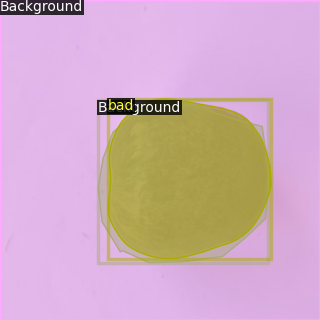

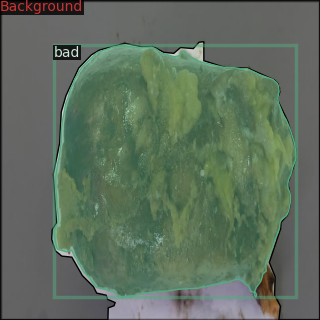

In [ ]:
#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

# Train Custom Detectron2 Detector

In [ ]:
#We are importing our own Trainer Module here to use the COCO validation evaluation during training. Otherwise no validation eval occurs.

from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
#from .detectron2.tools.train_net import Trainer
#from detectron2.engine import DefaultTrainer
# select from modelzoo here: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md#coco-object-detection-baselines

from detectron2.config import get_cfg
#from detectron2.evaluation.coco_evaluation import COCOEvaluator
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 5000 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (1000, 5001)
cfg.SOLVER.GAMMA = 0.05




cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4 #your number of classes + 1

cfg.TEST.EVAL_PERIOD = 500


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[10/03 10:28:42 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
model_final_68b088.pkl: 421MB [00:02, 144MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/03 10:28:47 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[10/03 10:29:46 d2.utils.events]:  eta: 3:09:55  iter: 19  total_loss: 2.4  loss_cls: 1.434  loss_box_reg: 0.9103  loss_rpn_cls: 0.0092  loss_rpn_loc: 0.01939    time: 2.2508  last_time: 2.4310  data_time: 0.0514  last_data_time: 0.0229   lr: 1.931e-06  max_mem: 6856M
[10/03 10:30:38 d2.utils.events]:  eta: 3:16:14  iter: 39  total_loss: 2.345  loss_cls: 1.401  loss_box_reg: 0.917  loss_rpn_cls: 0.008286  loss_rpn_loc: 0.02133    time: 2.3563  last_time: 2.4709  data_time: 0.0297  last_data_time: 0.0203   lr: 2.911e-06  max_mem: 6856M
[10/03 10:31:25 d2.utils.events]:  eta: 3:09:35  iter: 59  total_loss: 2.278  loss_cls: 1.315  loss_box_reg: 0.9331  loss_rpn_cls: 0.00646  loss_rpn_loc: 0.02075    time: 2.3444  last_time: 2.2954  data_time: 0.0278  last_data_time: 0.0162   lr: 3.891e-06  max_mem: 6856M
[10/03 10:32:12 d2.utils.events]:  eta: 3:13:06  iter: 79  total_loss: 2.165  loss_cls: 1.218  loss_box_reg: 0.9017  loss_rpn_cls: 0.003274  loss_rpn_loc: 0.01616    time: 2.3553  last_ti

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/03 10:49:25 d2.evaluation.evaluator]: Inference done 11/453. Dataloading: 0.0012 s/iter. Inference: 0.1894 s/iter. Eval: 0.0003 s/iter. Total: 0.1909 s/iter. ETA=0:01:24
[10/03 10:49:30 d2.evaluation.evaluator]: Inference done 37/453. Dataloading: 0.0015 s/iter. Inference: 0.1902 s/iter. Eval: 0.0003 s/iter. Total: 0.1921 s/iter. ETA=0:01:19
[10/03 10:49:35 d2.evaluation.evaluator]: Inference done 63/453. Dataloading: 0.0038 s/iter. Inference: 0.1903 s/iter. Eval: 0.0004 s/iter. Total: 0.1945 s/iter. ETA=0:01:15
[10/03 10:49:40 d2.evaluation.evaluator]: Inference done 88/453. Dataloading: 0.0034 s/iter. Inference: 0.1902 s/iter. Eval: 0.0047 s/iter. Total: 0.1985 s/iter. ETA=0:01:12
[10/03 10:49:45 d2.evaluation.evaluator]: Inference done 114/453. Dataloading: 0.0032 s/iter. Inference: 0.1902 s/iter. Eval: 0.0037 s/iter. Total: 0.1973 s/iter. ETA=0:01:06
[10/03 10:49:50 d2.evaluation.evaluator]: Inference done 140/453. Dataloading: 0.0038 s/iter. Inference: 0.1902 s/iter. Eval: 0.0

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/03 11:11:11 d2.evaluation.evaluator]: Inference done 11/453. Dataloading: 0.0011 s/iter. Inference: 0.1899 s/iter. Eval: 0.0003 s/iter. Total: 0.1913 s/iter. ETA=0:01:24
[10/03 11:11:16 d2.evaluation.evaluator]: Inference done 37/453. Dataloading: 0.0029 s/iter. Inference: 0.1901 s/iter. Eval: 0.0003 s/iter. Total: 0.1935 s/iter. ETA=0:01:20
[10/03 11:11:21 d2.evaluation.evaluator]: Inference done 63/453. Dataloading: 0.0031 s/iter. Inference: 0.1901 s/iter. Eval: 0.0003 s/iter. Total: 0.1937 s/iter. ETA=0:01:15
[10/03 11:11:26 d2.evaluation.evaluator]: Inference done 89/453. Dataloading: 0.0028 s/iter. Inference: 0.1902 s/iter. Eval: 0.0003 s/iter. Total: 0.1935 s/iter. ETA=0:01:10
[10/03 11:11:32 d2.evaluation.evaluator]: Inference done 115/453. Dataloading: 0.0036 s/iter. Inference: 0.1900 s/iter. Eval: 0.0003 s/iter. Total: 0.1941 s/iter. ETA=0:01:05
[10/03 11:11:37 d2.evaluation.evaluator]: Inference done 141/453. Dataloading: 0.0033 s/iter. Inference: 0.1900 s/iter. Eval: 0.0

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/03 11:33:09 d2.evaluation.evaluator]: Inference done 11/453. Dataloading: 0.0015 s/iter. Inference: 0.1885 s/iter. Eval: 0.0003 s/iter. Total: 0.1903 s/iter. ETA=0:01:24
[10/03 11:33:14 d2.evaluation.evaluator]: Inference done 38/453. Dataloading: 0.0020 s/iter. Inference: 0.1888 s/iter. Eval: 0.0003 s/iter. Total: 0.1912 s/iter. ETA=0:01:19
[10/03 11:33:19 d2.evaluation.evaluator]: Inference done 64/453. Dataloading: 0.0046 s/iter. Inference: 0.1894 s/iter. Eval: 0.0003 s/iter. Total: 0.1945 s/iter. ETA=0:01:15
[10/03 11:33:24 d2.evaluation.evaluator]: Inference done 91/453. Dataloading: 0.0040 s/iter. Inference: 0.1893 s/iter. Eval: 0.0003 s/iter. Total: 0.1937 s/iter. ETA=0:01:10
[10/03 11:33:29 d2.evaluation.evaluator]: Inference done 117/453. Dataloading: 0.0038 s/iter. Inference: 0.1893 s/iter. Eval: 0.0003 s/iter. Total: 0.1935 s/iter. ETA=0:01:05
[10/03 11:33:34 d2.evaluation.evaluator]: Inference done 143/453. Dataloading: 0.0039 s/iter. Inference: 0.1891 s/iter. Eval: 0.0

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/03 11:54:55 d2.evaluation.evaluator]: Inference done 11/453. Dataloading: 0.0009 s/iter. Inference: 0.1886 s/iter. Eval: 0.0003 s/iter. Total: 0.1898 s/iter. ETA=0:01:23
[10/03 11:55:01 d2.evaluation.evaluator]: Inference done 38/453. Dataloading: 0.0016 s/iter. Inference: 0.1881 s/iter. Eval: 0.0003 s/iter. Total: 0.1902 s/iter. ETA=0:01:18
[10/03 11:55:06 d2.evaluation.evaluator]: Inference done 64/453. Dataloading: 0.0029 s/iter. Inference: 0.1885 s/iter. Eval: 0.0003 s/iter. Total: 0.1918 s/iter. ETA=0:01:14
[10/03 11:55:11 d2.evaluation.evaluator]: Inference done 91/453. Dataloading: 0.0028 s/iter. Inference: 0.1885 s/iter. Eval: 0.0003 s/iter. Total: 0.1916 s/iter. ETA=0:01:09
[10/03 11:55:16 d2.evaluation.evaluator]: Inference done 117/453. Dataloading: 0.0032 s/iter. Inference: 0.1884 s/iter. Eval: 0.0003 s/iter. Total: 0.1920 s/iter. ETA=0:01:04
[10/03 11:55:21 d2.evaluation.evaluator]: Inference done 144/453. Dataloading: 0.0031 s/iter. Inference: 0.1884 s/iter. Eval: 0.0

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/03 12:16:50 d2.evaluation.evaluator]: Inference done 11/453. Dataloading: 0.0010 s/iter. Inference: 0.1873 s/iter. Eval: 0.0003 s/iter. Total: 0.1886 s/iter. ETA=0:01:23
[10/03 12:16:56 d2.evaluation.evaluator]: Inference done 38/453. Dataloading: 0.0017 s/iter. Inference: 0.1877 s/iter. Eval: 0.0003 s/iter. Total: 0.1899 s/iter. ETA=0:01:18
[10/03 12:17:01 d2.evaluation.evaluator]: Inference done 64/453. Dataloading: 0.0030 s/iter. Inference: 0.1882 s/iter. Eval: 0.0003 s/iter. Total: 0.1916 s/iter. ETA=0:01:14
[10/03 12:17:06 d2.evaluation.evaluator]: Inference done 90/453. Dataloading: 0.0035 s/iter. Inference: 0.1883 s/iter. Eval: 0.0003 s/iter. Total: 0.1923 s/iter. ETA=0:01:09
[10/03 12:17:11 d2.evaluation.evaluator]: Inference done 117/453. Dataloading: 0.0033 s/iter. Inference: 0.1882 s/iter. Eval: 0.0003 s/iter. Total: 0.1920 s/iter. ETA=0:01:04
[10/03 12:17:16 d2.evaluation.evaluator]: Inference done 143/453. Dataloading: 0.0036 s/iter. Inference: 0.1882 s/iter. Eval: 0.0

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/03 12:38:42 d2.evaluation.evaluator]: Inference done 11/453. Dataloading: 0.0015 s/iter. Inference: 0.1865 s/iter. Eval: 0.0003 s/iter. Total: 0.1883 s/iter. ETA=0:01:23
[10/03 12:38:47 d2.evaluation.evaluator]: Inference done 38/453. Dataloading: 0.0018 s/iter. Inference: 0.1873 s/iter. Eval: 0.0003 s/iter. Total: 0.1895 s/iter. ETA=0:01:18
[10/03 12:38:52 d2.evaluation.evaluator]: Inference done 64/453. Dataloading: 0.0034 s/iter. Inference: 0.1875 s/iter. Eval: 0.0003 s/iter. Total: 0.1913 s/iter. ETA=0:01:14
[10/03 12:38:57 d2.evaluation.evaluator]: Inference done 90/453. Dataloading: 0.0035 s/iter. Inference: 0.1879 s/iter. Eval: 0.0003 s/iter. Total: 0.1918 s/iter. ETA=0:01:09
[10/03 12:39:02 d2.evaluation.evaluator]: Inference done 116/453. Dataloading: 0.0039 s/iter. Inference: 0.1879 s/iter. Eval: 0.0003 s/iter. Total: 0.1921 s/iter. ETA=0:01:04
[10/03 12:39:07 d2.evaluation.evaluator]: Inference done 143/453. Dataloading: 0.0035 s/iter. Inference: 0.1878 s/iter. Eval: 0.0

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/03 13:00:24 d2.evaluation.evaluator]: Inference done 11/453. Dataloading: 0.0010 s/iter. Inference: 0.1864 s/iter. Eval: 0.0003 s/iter. Total: 0.1877 s/iter. ETA=0:01:22
[10/03 13:00:30 d2.evaluation.evaluator]: Inference done 38/453. Dataloading: 0.0017 s/iter. Inference: 0.1870 s/iter. Eval: 0.0003 s/iter. Total: 0.1892 s/iter. ETA=0:01:18
[10/03 13:00:35 d2.evaluation.evaluator]: Inference done 64/453. Dataloading: 0.0030 s/iter. Inference: 0.1871 s/iter. Eval: 0.0003 s/iter. Total: 0.1907 s/iter. ETA=0:01:14
[10/03 13:00:40 d2.evaluation.evaluator]: Inference done 91/453. Dataloading: 0.0032 s/iter. Inference: 0.1871 s/iter. Eval: 0.0003 s/iter. Total: 0.1908 s/iter. ETA=0:01:09
[10/03 13:00:45 d2.evaluation.evaluator]: Inference done 118/453. Dataloading: 0.0029 s/iter. Inference: 0.1873 s/iter. Eval: 0.0003 s/iter. Total: 0.1907 s/iter. ETA=0:01:03
[10/03 13:00:50 d2.evaluation.evaluator]: Inference done 144/453. Dataloading: 0.0033 s/iter. Inference: 0.1873 s/iter. Eval: 0.0

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/03 13:22:15 d2.evaluation.evaluator]: Inference done 11/453. Dataloading: 0.0010 s/iter. Inference: 0.1890 s/iter. Eval: 0.0003 s/iter. Total: 0.1903 s/iter. ETA=0:01:24
[10/03 13:22:20 d2.evaluation.evaluator]: Inference done 38/453. Dataloading: 0.0026 s/iter. Inference: 0.1880 s/iter. Eval: 0.0003 s/iter. Total: 0.1910 s/iter. ETA=0:01:19
[10/03 13:22:25 d2.evaluation.evaluator]: Inference done 64/453. Dataloading: 0.0047 s/iter. Inference: 0.1880 s/iter. Eval: 0.0003 s/iter. Total: 0.1933 s/iter. ETA=0:01:15
[10/03 13:22:30 d2.evaluation.evaluator]: Inference done 91/453. Dataloading: 0.0040 s/iter. Inference: 0.1880 s/iter. Eval: 0.0003 s/iter. Total: 0.1925 s/iter. ETA=0:01:09
[10/03 13:22:36 d2.evaluation.evaluator]: Inference done 117/453. Dataloading: 0.0045 s/iter. Inference: 0.1884 s/iter. Eval: 0.0003 s/iter. Total: 0.1934 s/iter. ETA=0:01:04
[10/03 13:22:41 d2.evaluation.evaluator]: Inference done 143/453. Dataloading: 0.0049 s/iter. Inference: 0.1885 s/iter. Eval: 0.0

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/03 13:43:56 d2.evaluation.evaluator]: Inference done 11/453. Dataloading: 0.0017 s/iter. Inference: 0.1869 s/iter. Eval: 0.0003 s/iter. Total: 0.1889 s/iter. ETA=0:01:23
[10/03 13:44:02 d2.evaluation.evaluator]: Inference done 38/453. Dataloading: 0.0023 s/iter. Inference: 0.1874 s/iter. Eval: 0.0003 s/iter. Total: 0.1901 s/iter. ETA=0:01:18
[10/03 13:44:07 d2.evaluation.evaluator]: Inference done 64/453. Dataloading: 0.0034 s/iter. Inference: 0.1876 s/iter. Eval: 0.0003 s/iter. Total: 0.1915 s/iter. ETA=0:01:14
[10/03 13:44:12 d2.evaluation.evaluator]: Inference done 91/453. Dataloading: 0.0032 s/iter. Inference: 0.1877 s/iter. Eval: 0.0003 s/iter. Total: 0.1913 s/iter. ETA=0:01:09
[10/03 13:44:17 d2.evaluation.evaluator]: Inference done 117/453. Dataloading: 0.0033 s/iter. Inference: 0.1880 s/iter. Eval: 0.0003 s/iter. Total: 0.1917 s/iter. ETA=0:01:04
[10/03 13:44:22 d2.evaluation.evaluator]: Inference done 143/453. Dataloading: 0.0036 s/iter. Inference: 0.1880 s/iter. Eval: 0.0

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/03 14:05:52 d2.evaluation.evaluator]: Inference done 11/453. Dataloading: 0.0032 s/iter. Inference: 0.1852 s/iter. Eval: 0.0004 s/iter. Total: 0.1888 s/iter. ETA=0:01:23
[10/03 14:05:57 d2.evaluation.evaluator]: Inference done 38/453. Dataloading: 0.0020 s/iter. Inference: 0.1853 s/iter. Eval: 0.0003 s/iter. Total: 0.1877 s/iter. ETA=0:01:17
[10/03 14:06:02 d2.evaluation.evaluator]: Inference done 65/453. Dataloading: 0.0025 s/iter. Inference: 0.1860 s/iter. Eval: 0.0003 s/iter. Total: 0.1889 s/iter. ETA=0:01:13
[10/03 14:06:07 d2.evaluation.evaluator]: Inference done 91/453. Dataloading: 0.0031 s/iter. Inference: 0.1868 s/iter. Eval: 0.0003 s/iter. Total: 0.1903 s/iter. ETA=0:01:08
[10/03 14:06:12 d2.evaluation.evaluator]: Inference done 117/453. Dataloading: 0.0028 s/iter. Inference: 0.1876 s/iter. Eval: 0.0003 s/iter. Total: 0.1908 s/iter. ETA=0:01:04
[10/03 14:06:17 d2.evaluation.evaluator]: Inference done 143/453. Dataloading: 0.0028 s/iter. Inference: 0.1885 s/iter. Eval: 0.0

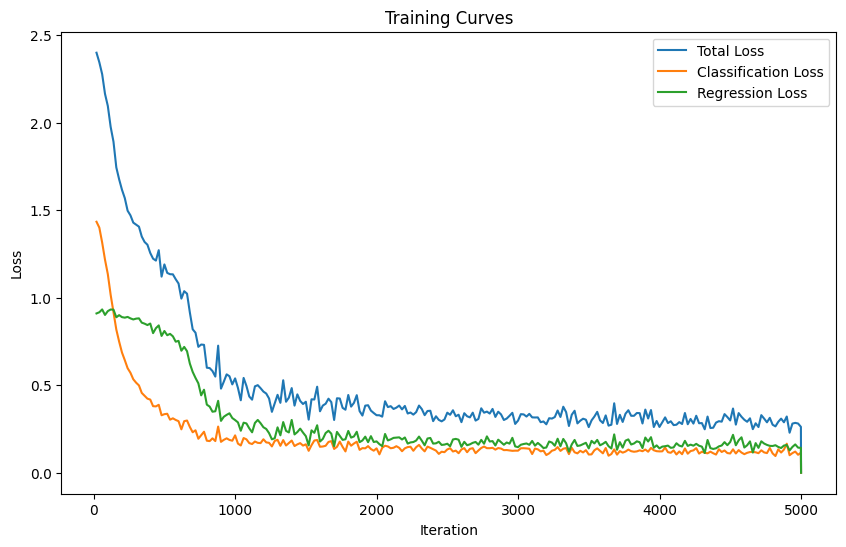

In [ ]:
import json
import matplotlib.pyplot as plt

# Read the metrics.json file
with open('/content/output/metrics.json', 'r') as f:
    metrics_data = f.readlines()

# Initialize lists for storing the iteration and loss values
iterations = []
total_losses = []
classification_losses = []
regression_losses = []

# Parse the metrics data
for line in metrics_data:
    metrics = json.loads(line)

    # Extract the relevant metrics with default values if key is missing
    iteration = metrics.get('iteration', 0)
    total_loss = metrics.get('total_loss', 0)
    classification_loss = metrics.get('loss_cls', 0)
    regression_loss = metrics.get('loss_box_reg', 0)

    # Append the values to the respective lists
    iterations.append(iteration)
    total_losses.append(total_loss)
    classification_losses.append(classification_loss)
    regression_losses.append(regression_loss)

# Plot the training curves
plt.figure(figsize=(10, 6))
plt.plot(iterations, total_losses, label='Total Loss')
plt.plot(iterations, classification_losses, label='Classification Loss')
plt.plot(iterations, regression_losses, label='Regression Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Curves')
plt.show()

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

<IPython.core.display.Javascript object>

In [ ]:
#test evaluation
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

[10/03 14:07:24 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...
WARNING [10/03 14:07:25 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [10/03 14:07:25 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/03 14:07:25 d2.data.datasets.coco]: Loaded 303 images in COCO format from /content/test/_annotations.coco.json
[10/03 14:07:25 d2.data.build]: Distribution of instances among all 4 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|   plums    | 0            | Background | 434          |    bad     | 267          |
|    good    | 47           |            |              |            |              |
|   total    | 748          |   

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/03 14:07:27 d2.evaluation.evaluator]: Inference done 11/303. Dataloading: 0.0016 s/iter. Inference: 0.1844 s/iter. Eval: 0.0003 s/iter. Total: 0.1863 s/iter. ETA=0:00:54
[10/03 14:07:33 d2.evaluation.evaluator]: Inference done 38/303. Dataloading: 0.0038 s/iter. Inference: 0.1852 s/iter. Eval: 0.0003 s/iter. Total: 0.1894 s/iter. ETA=0:00:50
[10/03 14:07:38 d2.evaluation.evaluator]: Inference done 65/303. Dataloading: 0.0030 s/iter. Inference: 0.1857 s/iter. Eval: 0.0003 s/iter. Total: 0.1891 s/iter. ETA=0:00:45
[10/03 14:07:43 d2.evaluation.evaluator]: Inference done 91/303. Dataloading: 0.0033 s/iter. Inference: 0.1863 s/iter. Eval: 0.0003 s/iter. Total: 0.1901 s/iter. ETA=0:00:40
[10/03 14:07:48 d2.evaluation.evaluator]: Inference done 117/303. Dataloading: 0.0039 s/iter. Inference: 0.1875 s/iter. Eval: 0.0003 s/iter. Total: 0.1918 s/iter. ETA=0:00:35
[10/03 14:07:53 d2.evaluation.evaluator]: Inference done 143/303. Dataloading: 0.0036 s/iter. Inference: 0.1882 s/iter. Eval: 0.0

OrderedDict([('bbox',
              {'AP': 66.67896801267,
               'AP50': 75.13557867248252,
               'AP75': 67.23124925404437,
               'APs': nan,
               'APm': 0.0,
               'APl': 66.80318173459165,
               'AP-plums': nan,
               'AP-Background': 69.01948489008923,
               'AP-bad': 88.30681653755087,
               'AP-good': 42.71060261036988})])

# Inference with Detectron2 Saved Weights



In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("my_dataset_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test")

In [ ]:
from detectron2.utils.visualizer import ColorMode
import glob

for imageName in glob.glob('/content/test/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata,
                scale=0.8
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])
